In [1]:
from __future__ import print_function
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Initialize "The Big Bang Theory" dataset

In [13]:
from tvd import TheBigBangTheory
dataset = TheBigBangTheory('/Users/bredin/Corpora/tvd/')


IN CASE YOU USE 'speaker' RESOURCES, PLEASE CONSIDER CITING:
@inproceedings{Tapaswi2012
    title = {{``Knock! Knock! Who is it?'' Probabilistic Person Identification in TV Series}},
    author = {Makarand Tapaswi and Martin B\"{a}uml and Rainer Stiefelhagen},
    booktitle = {IEEE Conference on Computer Vision and Pattern Recognition (CVPR)},
    year = {2012},
    month = {June},
}


IN CASE YOU USE 'outline' RESOURCES, PLEASE CONSIDER CITING:
@misc{the-big-bang-theory.com,
    title = {{The Big Bang Theory Wiki}},
    howpublished = \url{http://wiki.the-big-bang-theory.com/}
}


IN CASE YOU USE 'transcript' RESOURCES, PLEASE CONSIDER CITING:
@misc{bigbangtrans,
    title = {{big bang theory transcripts}},
    howpublished = \url{http://bigbangtrans.wordpress.com/}
}


IN CASE YOU USE 'transcript_www' RESOURCES, PLEASE CONSIDER CITING:
@misc{bigbangtrans,
    title = {{big bang theory transcripts}},
    howpublished = \url{http://bigbangtrans.wordpress.com/}
}


IN CASE YOU USE 'out

# First episode

In [3]:
firstEpisode = dataset.episodes[0]
firstEpisode

Episode(series='TheBigBangTheory', season=1, episode=1)

# English subtitles

In [4]:
from pyannote.parser import SRTParser
path = dataset.path_to_subtitles(firstEpisode, language='en')
englishSubtitles = SRTParser(split=True, duration=True).read(path)()

**`englishSubtitles`** is an instance of [`pyannote.core.Transcription`](https://github.com/pyannote/pyannote-core/blob/master/doc/pyannote.core.transcription.ipynb)

It is basically a directed graph where nodes are instants and edges represent temporal intervals.

In [5]:
for startTime, endTime, data in englishSubtitles.ordered_edges_iter(data=True):
    if endTime > 30:
        break
    print('{s:6.3f} --> {e:6.3f} : {d}'.format(s=startTime, e=endTime, d=data))

  -inf -->  1.240 : {}
 1.240 -->  3.834 : {'subtitle': u'If a photon is directed through a plane with two slits in it...'}
 3.834 -->  4.000 : {}
 4.000 -->  5.149 : {'subtitle': u'...and either is observed...'}
 5.149 -->  5.319 : {}
 5.319 -->  7.549 : {'subtitle': u'...it will not go through both. If unobserved. it will.'}
 7.549 -->  7.719 : {}
 7.719 --> 11.109 : {'subtitle': u"If it's observed after it's left the plane. but before it hits its target..."}
11.109 --> 11.279 : {}
11.279 --> 13.481 : {'subtitle': u"-...it will not've gone through both slits."}
13.481 --> 13.839 : {'subtitle': u'Agreed.'}
13.839 --> 13.999 : {}
13.999 --> 15.068 : {'subtitle': u"What's your point?"}
15.068 --> 15.239 : {}
15.239 --> 18.072 : {'subtitle': u"There's no point. I just think it's a good idea for a T-shirt."}
18.072 --> 23.400 : {}
23.400 --> 24.855 : {'subtitle': u'-Excuse me.'}
24.855 --> 25.914 : {'subtitle': u'Hang on.'}
25.914 --> 29.119 : {}


# Manual transcript

In [6]:
transcript = dataset.get_resource('transcript', firstEpisode)

**`transcript`** is also an instance of [`pyannote.core.Transcription`](https://github.com/pyannote/pyannote-core/blob/master/doc/pyannote.core.transcription.ipynb).

However, exact timing is missing. Only "floating" instants are available.

In [7]:
for startTime, endTime, data in transcript.ordered_edges_iter(data=True):
    if endTime > 'M':
        break
    if 'speech' not in data:
        continue
    print('"{s}" --> "{e}" {character} : {line}'.format(s=startTime, e=endTime, 
                                                        character=data.get('speaker', ''), 
                                                        line=data.get('speech', '')))

"C" --> "D" SHELDON : So if a photon is directed through a plane with two slits in it and either slit is observed, it will not go through both slits. If it's unobserved it will, however, if it's observed after it's left the plane but before it hits its target, it will not have gone through both slits.
"E" --> "F" LEONARD : Agreed, what's your point?
"G" --> "H" SHELDON : There's no point, I just think it's a good idea for a tee-shirt.
"I" --> "J" LEONARD : Excuse me?
"K" --> "L" RECEPTIONIST : Hang on.


# Audio features extraction

In [8]:
pathToEnglishTrack = dataset.path_to_audio(firstEpisode, language='en')

In [11]:
import librosa
y, sr = librosa.load(pathToEnglishTrack, sr=None, mono=True)
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

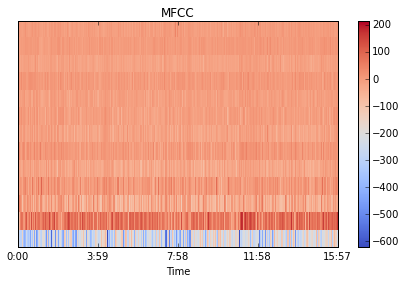

In [12]:
librosa.display.specshow(mfcc, x_axis='time')
colorbar(); title('MFCC'); tight_layout();